<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 9 – Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070

## Tugas Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Buatlah Fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi(SED) berbentuk cross 3*3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti dibawah ini

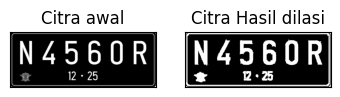

In [3]:
#dilasi tanpa library
def dilasi_citra(F,w):
  # size image
  p,q= F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi(SED)
  SED = np.ones((w,w), dtype=np.uint8)
  constant1 = (w-1)//2

  #proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

img_d = cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 5, 25, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131), plt.imshow(img_d, cmap='gray'),
plt.title('Citra awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray'),
plt.title('Citra Hasil dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan structuring element erosi(SE) berbentuk square 5 * 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti dibawah ini:

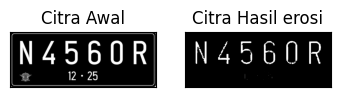

In [4]:
#erosi tanpa library

def erosi_citra(F,k):
  # size image
  m, n= F.shape

  #generate structure element erosi(SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #proses erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

img_e= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 250, 400, cv2.THRESH_BINARY)
k=5
imgE= erosi_citra(thresh1,k)

plt.subplot(131), plt.imshow(img_e, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray'),
plt.title('Citra Hasil erosi'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

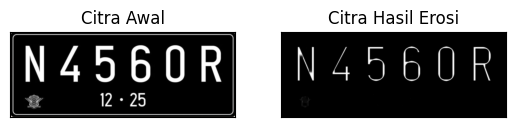

In [5]:
# error library
img= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg')

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=5)
plt.subplot(121), plt.imshow(img),plt.title('Citra Awal'),
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:  
**Operasi Opening Menggunakan tanpa Library Morphology**

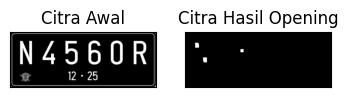

In [6]:
img_o= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
reto, thresho = cv2.threshold(img_o, 170, 295, cv2.THRESH_BINARY)
k=39
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()


**Operasi Opening Menggunakan Library Morphology**

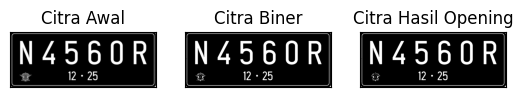

In [7]:
#Dengan menggunakan library
img = cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:  
operasi closing tanpa library morphology

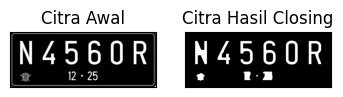

In [8]:
img_c= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
retc, threshc = cv2.threshold(img_c, 170, 295, cv2.THRESH_BINARY)
k=39
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

operasi closing dengan library morphology

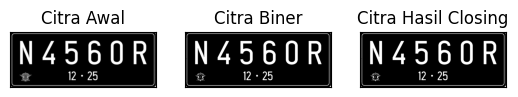

In [9]:
img = cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:  

SED = Cross 3


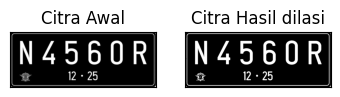

SED = Cross 5


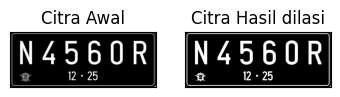

In [10]:
# Dilasi Cross SED

def dilasi_citra(F,w):
  #size image
  p, q= F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi(SED)
  #SED = np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=np.uint8)
  constant1 = (w-1)//2

  #proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131), plt.imshow(img_d, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray'),
plt.title('Citra Hasil dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p, q= F.shape

  imgD = np.zeros((p,q), dtype=np.uint)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131), plt.imshow(img_d, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray'),
plt.title('Citra Hasil dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Circular 3


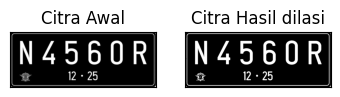

SED = Circle 5


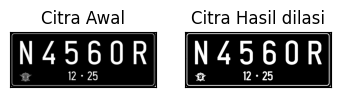

In [11]:
#dilasi circular SED

def dilasi_citra(F,w):
  #size image
  p, q= F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)

  #generate structure element dilasi(SED)
  SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1 = (w-1)//2

  #proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)

  return imgD

print('SED = Circular 3')
img_d= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131), plt.imshow(img_d, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray'),
plt.title('Citra Hasil dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131), plt.imshow(img_d, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray'),
plt.title('Citra Hasil dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

SE = Rectangle 3 x 5


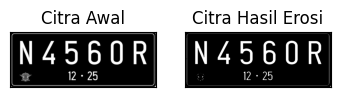

SE = Rectangle 5 x 7


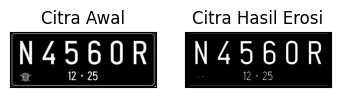

In [12]:
# erosi cross SE
def erosi_citra(F,p,l):
  # size image
  m, n= F.shape

  #generate structure element erosi
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l))

  constant1 = (l-1)//2
  constant2 = (p-1)//2
  #print
  imgE= np.zeros((m,n),dtype=np.uint8)

  #proses erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2, n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

print('SE = Rectangle 3 x 5')
img_e= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)

ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=3
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131), plt.imshow(img_e, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray'),
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5 x 7')
img_e= cv2.imread('/content/drive/MyDrive/Images/platnomer.jpg',0)

ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131), plt.imshow(img_e, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray'),
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()



 Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SE = Line Vertikal 3


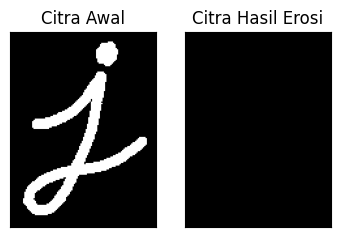

SE = Line Vertikal 5


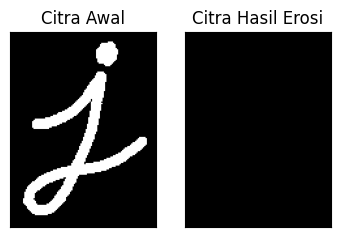

In [13]:
# Erosi line vertikal SE

def erosi_citra(F,k):
  #size image
  m, n= F.shape

  #generate structure element erosi SE
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(k,1))
  constant = (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #proses erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/Images/j.png',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131), plt.imshow(img_e, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray'),
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/Images/j.png',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131), plt.imshow(img_e, cmap='gray'),
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray'),
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

TOP HAT

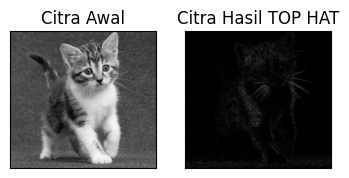

In [14]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
                filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img,
              cv2.MORPH_TOPHAT,
              kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

Blackhat

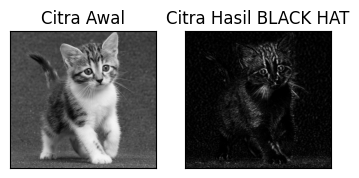

In [15]:
filterSize=(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
# tophat_img = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT,kernel)
kernel= cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
blackhat= cv2.morphologyEx(img, cv2.MORPH_BLACKHAT,kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil BLACK HAT'), plt.xticks([]), plt.yticks([])
plt.show()


Skeleton

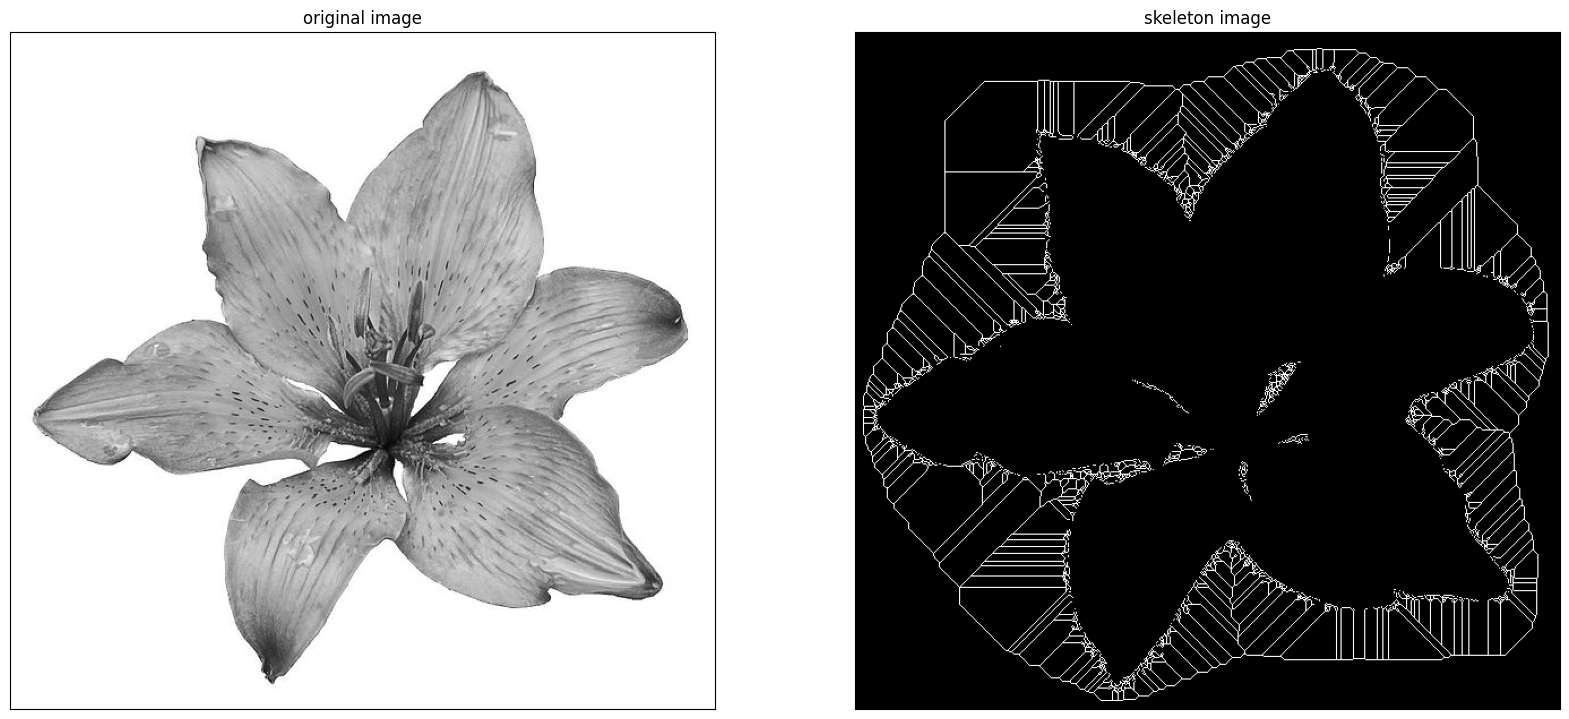

In [16]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/Images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)

#true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0
#skeleton image
skeleton = skeletonize(binary_cp)

#show image
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('original image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

skeleton inverse


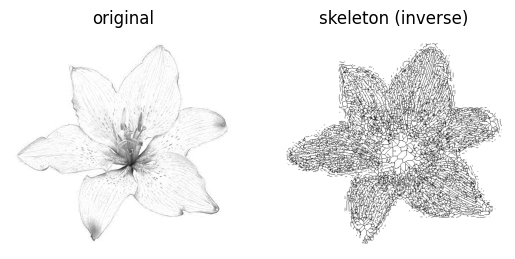

In [17]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/Images/lily.jpg')[..., 0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

thickening

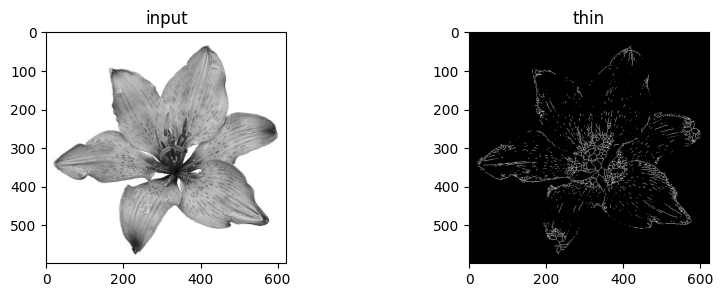

In [18]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('thin')

plt.savefig('/tmp/char_out.png')
plt.show()

##E. Tugas Praktikum
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

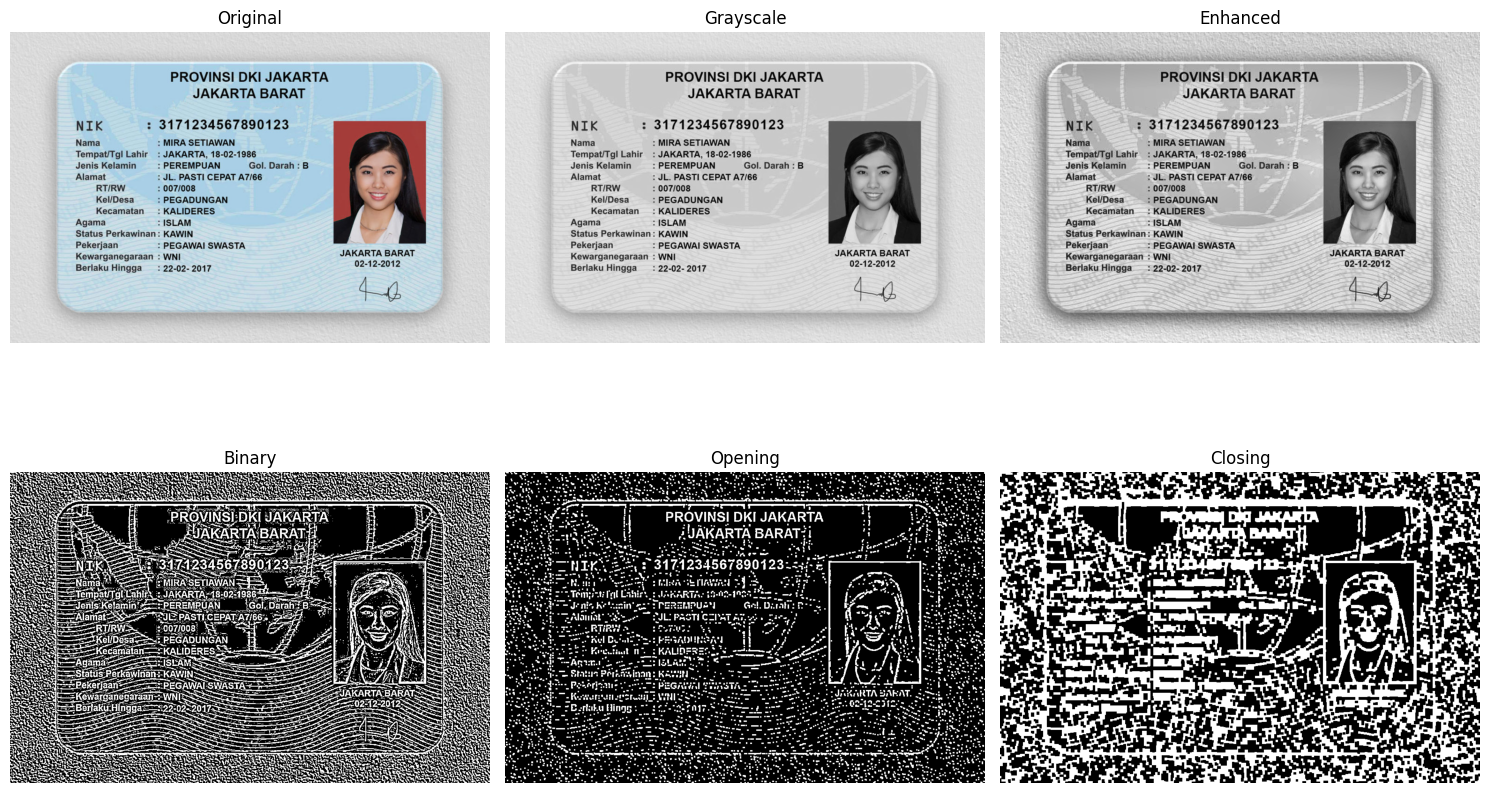

In [25]:
# preprocessing
def load_and_preprocess(image):
    img = cv2.imread(image)
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)

    return img, grayscale, blurred

# adaptive thresholding
def apply_thresholding(blurred_img):
    thresh = cv2.adaptiveThreshold(
        blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )
    return thresh

# operasi morfologi
def apply_morphological_operations(binary_img):
    kernel_small = np.ones(
        (3,3),
        np.uint8
        )
    kernel_medium = np.ones(
        (5,5),
        np.uint8
        )

    opening = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel_small)
    dilation = cv2.dilate(opening, kernel_small, iterations=1)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_medium)

    return opening, dilation, closing

# meningkatkan kontras text
def enhance_text_regions(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(img)

    return enhanced

# finishing show all
def all_process(image):
    original, grayscale, blurred = load_and_preprocess(image)

    enhanced = enhance_text_regions(grayscale)
    binary = apply_thresholding(enhanced)
    opening, dilation, closing = apply_morphological_operations(binary)

    plt.figure(figsize=(15, 10))
    images = [original, grayscale, enhanced, binary, opening, closing]
    titles = ['Original', 'Grayscale', 'Enhanced', 'Binary', 'Opening', 'Closing']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i+1)
        if len(img.shape) == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# terapkan pada ktp
image = '/content/drive/MyDrive/ktp.jpg'
all_process(image)